<a href="https://colab.research.google.com/github/InutilemMachina/DataSciRepo/blob/main/0_Workflow%26Pipelines_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workflow and pipelines**

*Author: László Hári*


---

`version: 2023.09.01`

*About the notebook:*

* Goal: ...
* Theory: ...
* Course: ...

Pipelines and composite estimators: https://scikit-learn.org/stable/modules/compose.html

Preprocessing data: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-transformer

Effect of transforming the targets in regression model: https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

Controlling randomness: https://scikit-learn.org/stable/common_pitfalls.html#controlling-randomness

Scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter



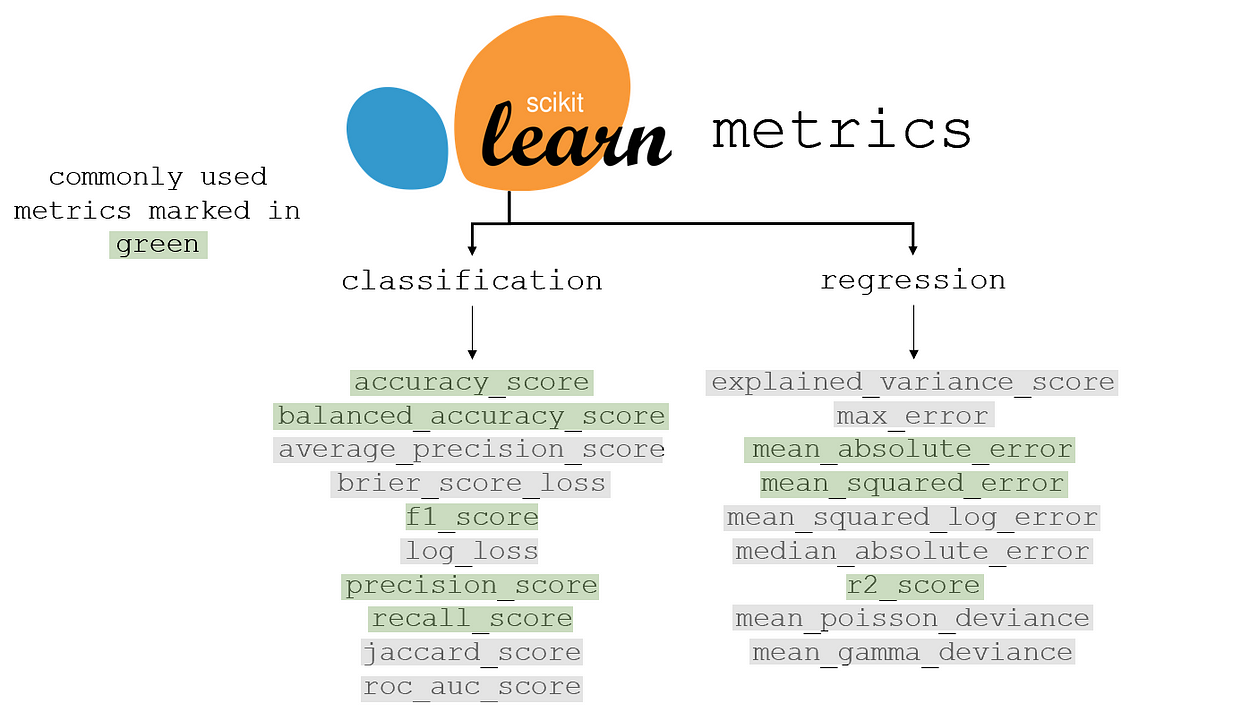

See more at scoring-parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

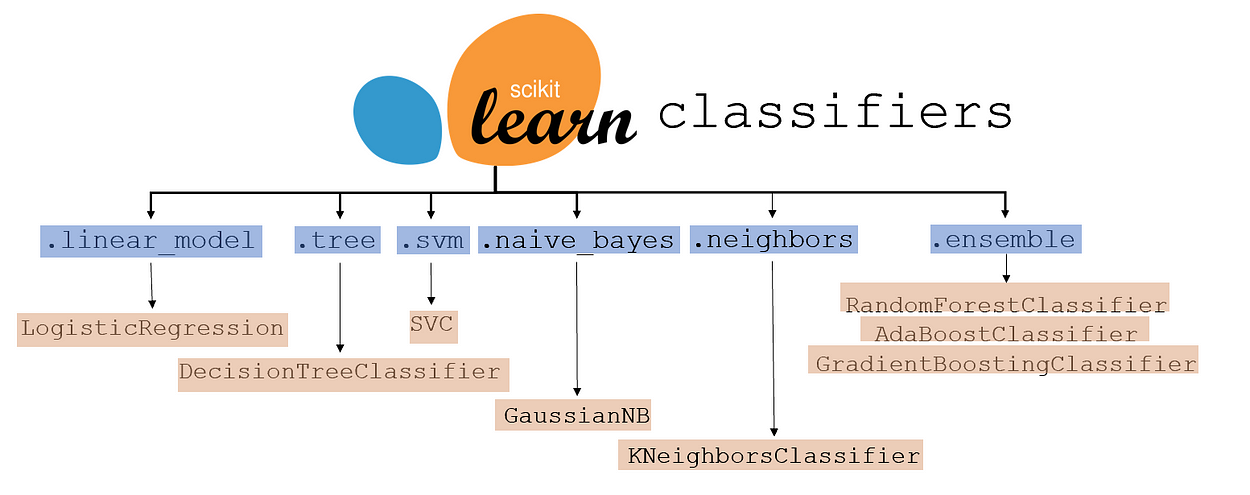

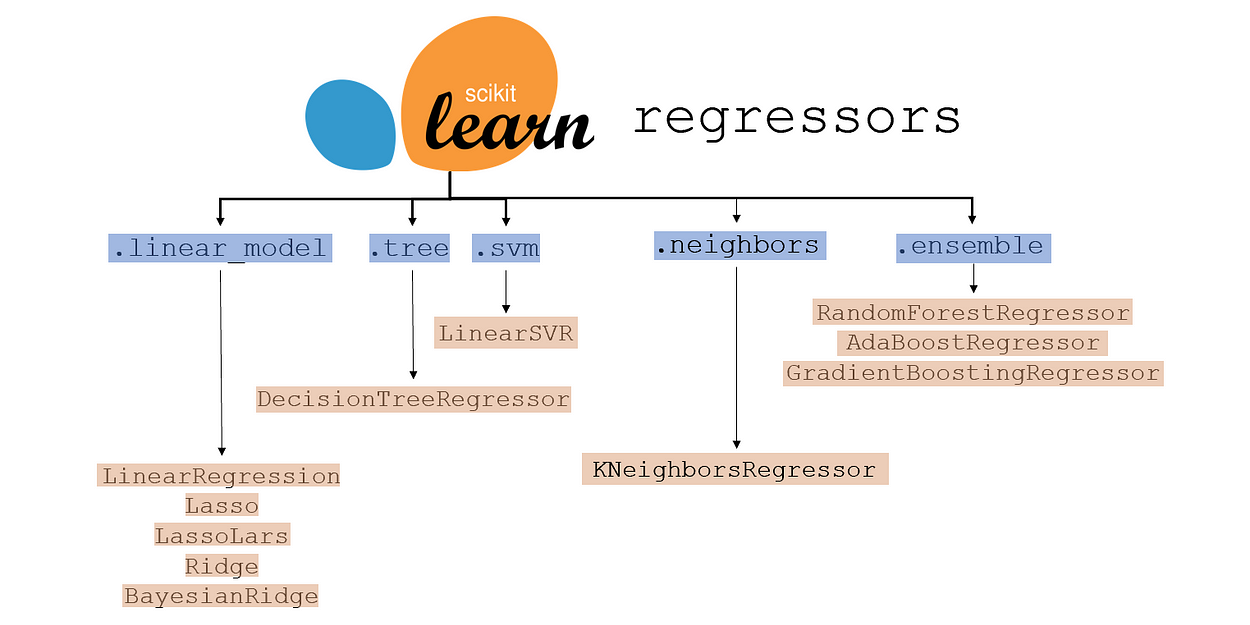

*preamble*

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4,3)

def plotlabels(ax,title,xlabel,ylabel):
    # use plt.gca() if plotted by plt.plot...
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    # ax.autoscale(enable=True, axis='both', tight=True)

# Simple modelling

In [2]:
# A really simple line, only the logic:
import random
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# SETUP:
# Fix the random seed for reproducibility
random.seed(0)  # Set the seed for the Python random module
np.random.seed(0)  # Set the seed for Numpy's random number generator
rng = 1  # Set the seed for Sklearn's random number generator
# rng = np.random.RandomState(0)  # Note for sklearn: not recommended setting the global numpy seed by calling np.random.seed(0)

# Generate some sample data
X = np.linspace(0,10,100) + np.random.rand(100)
y = 2 + 3*X + 4*np.random.rand(100)

# Shape data for sklearn conventions.
X = X.reshape(-1, 1)
# y = y.reshape(-1, 1)  # erre nincs szükség

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = rng)

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit only X_train and the transformation should be applied X_train and X_test
X_test_scaled = scaler.transform(X_test)

# MODELLING:
# Create the model
model = SVR(kernel='rbf')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (test): {rmse:.2f}")

RMSE (test): 1.66


# Simple modelling with pipeline

In [3]:
import random
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Set random seeds for reproducibility
random.seed(0)
np.random.seed(0)
rng = 1

# Generate sample data
X = np.linspace(0, 10, 100) + np.random.rand(100)
y = 2 + 3 * X + 4 * np.random.rand(100)
X = X.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)

# MAKE A PIPELINE:
model = make_pipeline(StandardScaler(),
                     SVR(kernel='rbf'))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (test): {rmse:.2f}")

RMSE (test): 1.66


# Extended modelling

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.
A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. - https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

By default cross_val_score uses the chosen model’s default scoring metric, but this can be overridden with your metric of choice in the scoring parameter. - https://stephenallwright.com/cross_val_score-sklearn/

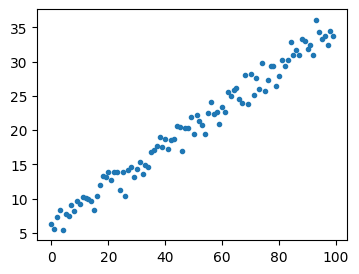

CV scores (train): 2.84, 2.22, 1.81, 1.82, 2.41
CV scores mean (train): 2.22
RMSE (test): 1.66


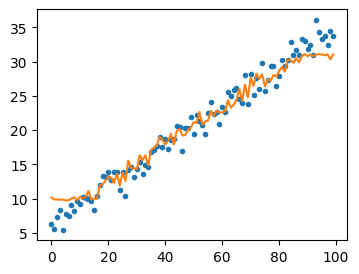

Randomized Search best score:  1.09
Randomized Search best parameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 10}
Best model CV scores (train): 1.07, 1.17, 1.16, 0.88, 1.16
Best model CV scores mean (train): 1.09
Best model RMSE (test): 1.21


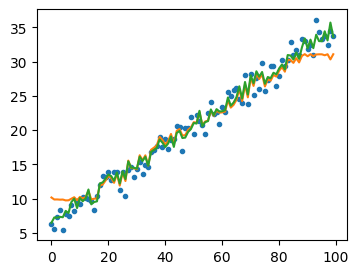

In [15]:
# A simple line with evaluations and remodelling
import random
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# SETUP:
# Fix the random seed for reproducibility
random.seed(0)  # Set the seed for the Python random module
np.random.seed(0)  # Set the seed for Numpy's random number generator
rng = 1  # Set the seed for Sklearn's random number generator
# rng = np.random.RandomState(0)  # Note for sklearn: not recommended setting the global numpy seed by calling np.random.seed(0)

# Generate some sample data
X = np.linspace(0,10,100) + np.random.rand(100)
y = 2 + 3*X + 4*np.random.rand(100)

# Shape data for sklearn conventions.
X = X.reshape(-1, 1)
# y = y.reshape(-1, 1)  # erre nincs szükség

# Plot the data
plt.plot(y,'.')
plt.show()

# PREPROCESS:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = rng)

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit only X_train and the transformation should be applied X_train and X_test
X_test_scaled = scaler.transform(X_test)

# MODELLING:
# Create the model
model = SVR(kernel='rbf')

# Train the model
model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores = abs(cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error'))
# print(f"CV scores: {cv_scores}")
print("CV scores (train):", ", ".join([f"{score:.2f}" for score in cv_scores]))
print("CV scores mean (train): {:.2f}".format(cv_scores.mean()))

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (test): {rmse:.2f}")

# Plot fit
X_new = X.copy() # vagy egy másik vektor: np.linspace(0,10,100)
X_new_scaled = scaler.transform(X_new.reshape(-1, 1))
y_new = model.predict(X_new_scaled)
plt.plot(y,'.')
plt.plot(y_new)
plt.show()

# TUNE THE MODEL:
# Randomized Parameter Optimization
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"C": [0.1, 1, 10],
              "gamma": [0.01, 0.1, 1],
              "kernel": ["linear", "rbf"]}
random_search = RandomizedSearchCV(model,
                                   param_distributions=param_dist,
                                   n_iter=9,
                                   cv=5,
                                   random_state = rng,
                                   scoring='neg_root_mean_squared_error')
random_search.fit(X_train_scaled, y_train)
print("Randomized Search best score: ", round(abs(random_search.best_score_),2))
print("Randomized Search best parameters:", random_search.best_params_)

# Extract the best parameters from GridSearchCV or RandomizedSearchCV
best_params = random_search.best_params_

# Create a new SVR model with the best parameters
best_model = SVR(**best_params)  # a new (SVR) model must be called

# Fit the new model to the scaled training data
best_model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores = abs(cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error'))
# print(f"CV scores: {cv_scores}")
print("Best model CV scores (train):", ", ".join([f"{score:.2f}" for score in cv_scores]))
print("Best model CV scores mean (train): {:.2f}".format(cv_scores.mean()))

# Make predictions on the test set
y_pred_best = best_model.predict(X_test_scaled)

# ReCalculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"Best model RMSE (test): {rmse:.2f}")

# Plot fit
y_best = best_model.predict(X_new_scaled)
plt.plot(y,'.')
plt.plot(y_new)
plt.plot(y_best)
plt.show()

# Extended modelling with pipeline
To improve the readability and maintainability of the code, we can create separate pipelines for data preprocessing, modeling, and tuning.

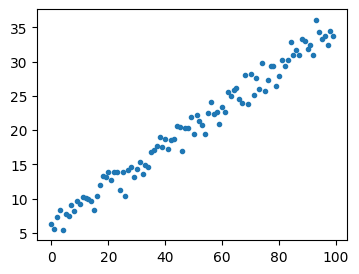

CV scores (train): 2.84, 2.22, 1.81, 1.82, 2.41
CV scores mean (train): 2.22
RMSE (test): 1.66


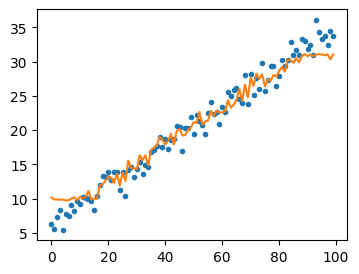

Randomized Search best score:  1.09
Randomized Search best parameters: {'svr__kernel': 'linear', 'svr__gamma': 0.1, 'svr__C': 10}
Best model CV scores (train): 1.07, 1.17, 1.16, 0.88, 1.16
Best model CV scores mean (train): 1.09
Best model RMSE (test): 1.21


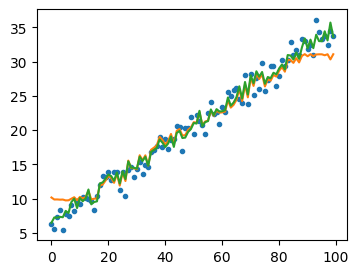

In [14]:
# A simple line with evaluations and remodelling
import random
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# SETUP:
# Fix the random seed for reproducibility
random.seed(0)  # Set the seed for the Python random module
np.random.seed(0)  # Set the seed for Numpy's random number generator
rng = 1  # Set the seed for Sklearn's random number generator
# rng = np.random.RandomState(0)  # Note for sklearn: not recommended setting the global numpy seed by calling np.random.seed(0)

# Generate some sample data
X = np.linspace(0,10,100) + np.random.rand(100)
y = 2 + 3*X + 4*np.random.rand(100)

# Shape data for sklearn conventions.
X = X.reshape(-1, 1)
# y = y.reshape(-1, 1)  # erre nincs szükség

# Plot the data
plt.plot(y,'.')
plt.show()

# PREPROCESS:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = rng)

# MODELLING:
# Create the model
model = make_pipeline(StandardScaler(),
                     SVR(kernel='rbf'))

# Train the model
model.fit(X_train, y_train)

# Cross-validation
cv_scores = abs(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'))
# print(f"CV scores: {cv_scores}")
print("CV scores (train):", ", ".join([f"{score:.2f}" for score in cv_scores]))
print("CV scores mean (train): {:.2f}".format(cv_scores.mean()))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (test): {rmse:.2f}")

# Plot fit
X_new = X.copy() # vagy egy másik vektor: np.linspace(0,10,100)
y_new = model.predict(X_new)
plt.plot(y,'.')
plt.plot(y_new)
plt.show()

# TUNE THE MODEL:
# Randomized Parameter Optimization
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    "svr__C": [0.1, 1, 10],  # Note the 'svr__' prefix to specify the SVR estimator
    "svr__gamma": [0.01, 0.1, 1],  # Note the 'svr__' prefix
    "svr__kernel": ["linear", "rbf"]  # Note the 'svr__' prefix
}

random_search = RandomizedSearchCV(model,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   random_state=rng,
                                   scoring='neg_root_mean_squared_error')

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)
print("Randomized Search best score: ", round(abs(random_search.best_score_),2))
print("Randomized Search best parameters:", random_search.best_params_)

################# ok, de itt nincs benne a best model ben a standard scaler, és az nem is pipeline lentebb ami most van ://///////////
# Extract the best parameters from GridSearchCV or RandomizedSearchCV
best_params = random_search.best_params_

# Create a new SVR model with the best parameters
best_SVR_model = SVR(C=best_params["svr__C"],
                 gamma=best_params["svr__gamma"],
                 kernel=best_params["svr__kernel"])
# vagy automatikusan kipakoljuk a dictionary-t
# Automatically create a new SVR model with the best parameters
# best_SVR_model = SVR(**{k.replace("svr__", ""): v for k, v in best_params.items()})

best_model = make_pipeline(StandardScaler(),
                           best_SVR_model)

# Fit the new model to the scaled training data
best_model.fit(X_train, y_train)

# Cross-validation
cv_scores = abs(cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'))
# print(f"CV scores: {cv_scores}")
print("Best model CV scores (train):", ", ".join([f"{score:.2f}" for score in cv_scores]))
print("Best model CV scores mean (train): {:.2f}".format(cv_scores.mean()))

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# ReCalculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"Best model RMSE (test): {rmse:.2f}")

# Plot fit
y_best = best_model.predict(X_new)
plt.plot(y,'.')
plt.plot(y_new)
plt.plot(y_best)
plt.show()

# Train, test and validation sets for competing models

Linear Regression Evaluation on Validation Set:
Mean Squared Error (MSE): 0.2647
R-squared (R2): 0.8353

Random Forest Regressor Evaluation on Validation Set:
Mean Squared Error (MSE): 0.3142
R-squared (R2): 0.8046

Best Model (LinearRegression) Evaluation on Test Set:
Mean Squared Error (MSE): 0.2101
R-squared (R2): 0.8364


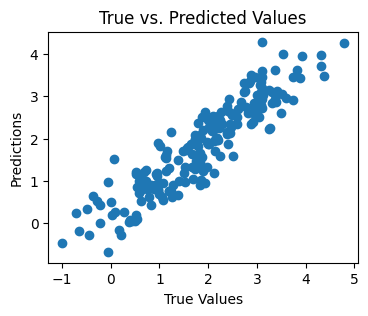

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_samples = 1000
X = np.random.rand(n_samples, 3)  # Replace 3 with the number of features you want
noise = np.random.randn(n_samples) * 0.5  # Adjust noise level as needed
y = 2 * X[:, 0] + 3 * X[:, 1] - 1 * X[:, 2] + noise  # Replace with your regression equation

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models on the training set
linear_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

# Predict on the validation set
linear_reg_val_predictions = linear_reg.predict(X_val)
random_forest_val_predictions = random_forest_reg.predict(X_val)

# Evaluate models on the validation set
def evaluate_model(predictions, true_values, model_name):
    mse = mean_squared_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    print(f'{model_name} Evaluation on Validation Set:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'R-squared (R2): {r2:.4f}\n')

evaluate_model(linear_reg_val_predictions, y_val, 'Linear Regression')
evaluate_model(random_forest_val_predictions, y_val, 'Random Forest Regressor')

# Choose the best model based on validation set performance
best_model = linear_reg if r2_score(y_val, linear_reg_val_predictions) > r2_score(y_val, random_forest_val_predictions) else random_forest_reg

# Now, evaluate the best model on the test set
test_predictions = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

print(f'Best Model ({type(best_model).__name__}) Evaluation on Test Set:')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'R-squared (R2): {r2_test:.4f}')

# Optionally, you can visualize the true vs. predicted values on the test set
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

# Train, test and validation sets for competing models in pipelines

Linear Regression Evaluation on Validation Set:
Mean Squared Error (MSE): 0.2647
R-squared (R2): 0.8353

Random Forest Regressor Evaluation on Validation Set:
Mean Squared Error (MSE): 0.3142
R-squared (R2): 0.8046

Best Model (LinearRegression) Evaluation on Test Set:
Mean Squared Error (MSE): 0.2101
R-squared (R2): 0.8364


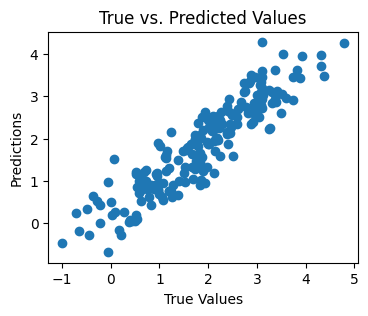

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_samples = 1000
X = np.random.rand(n_samples, 3)  # Replace 3 with the number of features you want
noise = np.random.randn(n_samples) * 0.5  # Adjust noise level as needed
y = 2 * X[:, 0] + 3 * X[:, 1] - 1 * X[:, 2] + noise  # Replace with your regression equation

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a pipeline with StandardScaler and the regression model
linear_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

random_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train models on the training set using pipelines
linear_reg_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)

# Predict on the validation set
linear_reg_val_predictions = linear_reg_pipeline.predict(X_val)
random_forest_val_predictions = random_forest_pipeline.predict(X_val)

# Evaluate models on the validation set
def evaluate_model(predictions, true_values, model_name):
    mse = mean_squared_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    print(f'{model_name} Evaluation on Validation Set:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'R-squared (R2): {r2:.4f}\n')

evaluate_model(linear_reg_val_predictions, y_val, 'Linear Regression')
evaluate_model(random_forest_val_predictions, y_val, 'Random Forest Regressor')

# Choose the best model based on validation set performance
best_model = linear_reg_pipeline if r2_score(y_val, linear_reg_val_predictions) > r2_score(y_val, random_forest_val_predictions) else random_forest_pipeline

# Now, evaluate the best model on the test set
test_predictions = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

print(f'Best Model ({type(best_model.named_steps["regressor"]).__name__}) Evaluation on Test Set:')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'R-squared (R2): {r2_test:.4f}')

# Optionally, you can visualize the true vs. predicted values on the test set
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()


Credits, Sources, Further readings:



---


```
version history:
@ 2023.09.01 - establishment
```

